### Imports

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as c
from astropy.cosmology import Planck15 as cosmo
import matplotlib.pyplot as plt

### Filament Model

In [2]:
import filament_model as fm

Read table:CIE_cool_M5.txt


### Profiles in Paper

In [3]:
Rv, r, rho, T, P, M = fm.filament_profile(2e9, 2, cosmo, mdef = '40m', model='isothermal_nodm')

Rv2, r2, rho2, T2, P2, M2 =fm.filament_profile(2e9, 2, cosmo, model='collapse', mdef='40m')

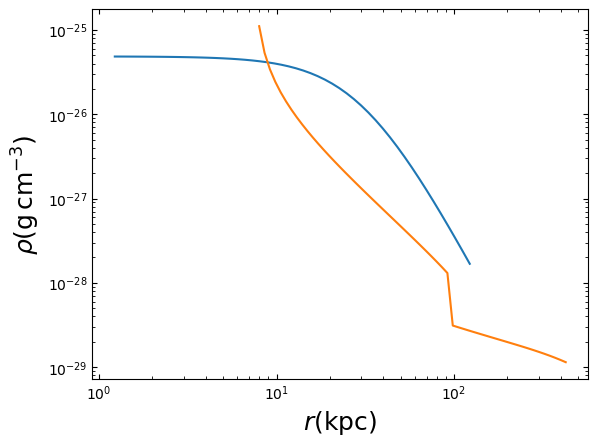

In [6]:
plt.plot(r, rho)
plt.plot(r2, rho2)
plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$\rho({\rm g\,cm}^{-3})$', fontsize=18)
plt.xlabel(r'$r({\rm kpc})$', fontsize=18)

plt.tick_params(which = 'both', direction='in', top=True, right=True)

In [7]:
tcool_prof = np.zeros(len(r))*u.s

tcool2_prof = np.zeros(len(r2))*u.s

### this will likely be updated to not require loop
for i in range(len(r)):
    tcool_prof[i] = fm.tcool(T[i], rho[i]*0.16)

for i in range(len(r2)):
    tcool2_prof[i] = fm.tcool(T2[i], rho2[i]*0.16)

tff_prof = fm.tff(M/(np.pi*r**2))
tff2_prof = fm.tff(M2/(np.pi*r2**2))

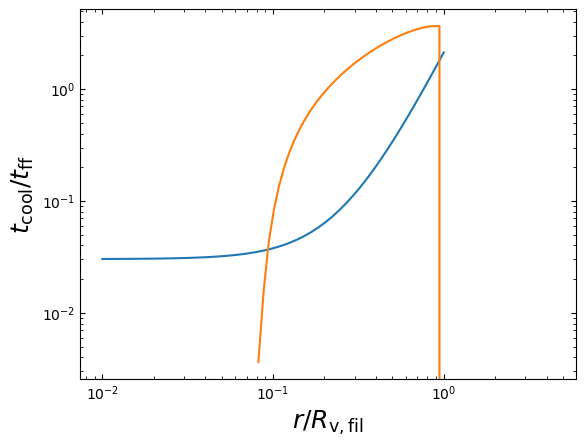

In [8]:
plt.plot(r/Rv, (tcool_prof/tff_prof).to(''))
plt.plot(r2/Rv2, (tcool2_prof/tff2_prof).to(''))
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$t_{\rm cool}/t_{\rm ff}$', fontsize=18)
plt.xlabel(r'$r/R_{\rm v,fil}$', fontsize=18)

plt.tick_params(which = 'both', direction='in', top=True, right=True)

### Example for Self-similar collapse model only

In [9]:
s = 1.5
delta = (s+2)/3
gamma = 5./3

init = [0.16, 0.  , 3.53]

lambda_sh, M_sh, r, D, P, V, M = fm.filament_profile_collapse_nonnorm(init,delta,gamma)

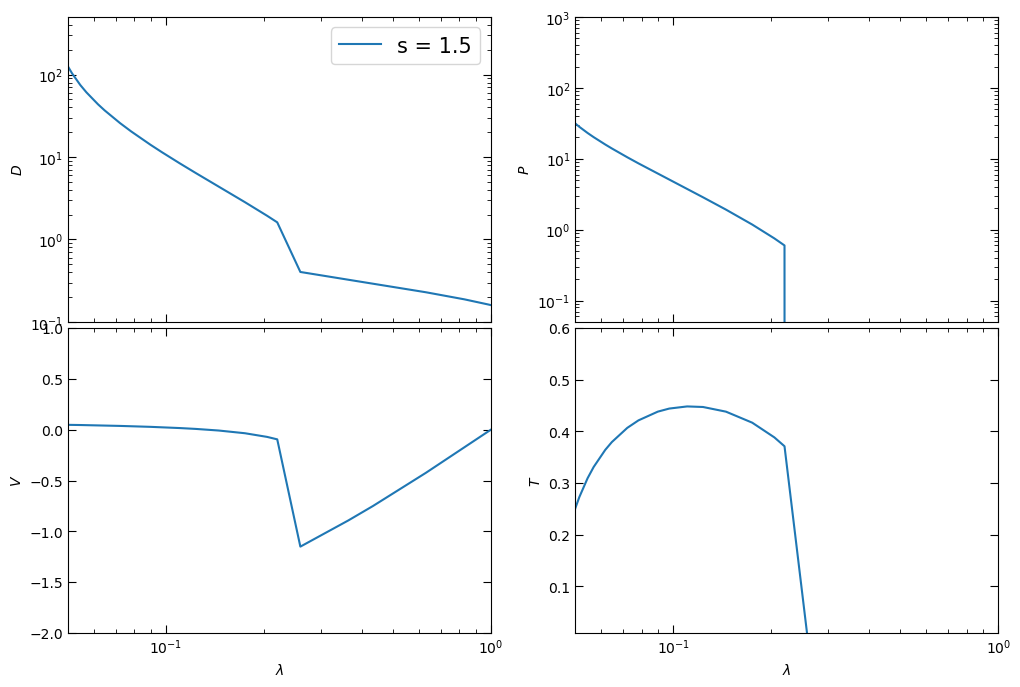

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (12,8), sharex = 'col')

axs[0, 0].plot(r, D, label = 's = {}'.format(s))
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")
axs[0, 0].set_ylim(bottom=0.1,top=500)
axs[0, 0].set_xlim(left=0.05, right=1)
axs[0, 0].set_ylabel(r'$D$')
axs[0, 0].tick_params(direction='in', length=6, top=True, right=True)
axs[0, 0].tick_params(which='minor',direction='in', length=3, top=True, right=True)
axs[0, 1].plot(r, P)
axs[0, 1].set_xscale("log")
axs[0, 1].set_yscale("log")
axs[0, 1].set_ylim(bottom=0.05,top=1000)
axs[0, 1].set_xlim(left=0.05, right=1)
axs[0, 1].set_ylabel(r'$P$')
axs[0, 1].tick_params(direction='in', length=6, top=True, right=True)
axs[0, 1].tick_params(which='minor',direction='in', length=3, top=True, right=True)
axs[1, 0].plot(r, V)
axs[1, 0].set_xscale("log")
axs[1, 0].set_ylim(bottom=-2,top=1)
axs[1, 0].set_xlim(left=0.05, right=1)
axs[1, 0].set_ylabel(r'$V$')
axs[1, 0].set_xlabel(r'$\lambda$')
axs[1, 0].tick_params(direction='in', length=6, top=True, right=True)
axs[1, 0].tick_params(which='minor',direction='in', length=3, top=True, right=True)
axs[1, 1].plot(r, P/D)
axs[1, 1].set_xscale("log")
axs[1, 1].set_ylim(bottom=0.01,top=0.6)
axs[1, 1].set_xlim(left=0.05, right=1)
axs[1, 1].set_ylabel(r'$T$')
axs[1, 1].set_xlabel(r'$\lambda$')
axs[1, 1].tick_params(direction='in', length=6, top=True, right=True)
axs[1, 1].tick_params(which='minor',direction='in', length=3, top=True, right=True)

#  for ax in axs.flat:
#     ax.set(xlabel=r'$\lambda$')
#     plt.tight_layout()

plt.subplots_adjust(hspace=0.02)
axs[0, 0].legend(prop={'size': 15})